In [17]:
'''
fix import for jupyter notebook try:
pip install ipykernel
python -m ipykernel install --user 


'''



'\nfix import for jupyter notebook try:\npip install ipykernel\npython -m ipykernel install --user \n\n\n'

In [18]:
import matplotlib as plt
import random

In [19]:
 ''' 
 create object for deck of 52 cards and shuffle
 '''


' \ncreate object for deck of 52 cards and shuffle\n'

In [247]:


class Deck:
    def __init__(self):
        self.cards=list(range(1,52))
        random.shuffle(self.cards)
        
    def show(self):
        print (self.cards)
        
 

In [251]:
a=Deck()
a.show()

[41, 48, 8, 25, 35, 22, 51, 18, 12, 39, 23, 49, 45, 34, 14, 37, 10, 6, 2, 33, 32, 26, 13, 44, 27, 29, 40, 21, 31, 46, 24, 11, 28, 47, 43, 17, 36, 5, 4, 15, 1, 20, 30, 7, 42, 19, 50, 38, 16, 3, 9]


In [272]:
#replace single card with left move


def play_move_left(in_flop,startpos,offset):
         
        outflop=in_flop[:]
        if (offset<startpos):
            outflop[offset]=outflop[startpos]
            del outflop[startpos]
        else:
            outflop[startpos]=outflop[offset]
            del outflop[offset]
        return outflop
    
    
print (play_move_left([1,2,3,4,5,6,7,8,9],-4,-3)  )
print (play_move_left([1,2,3,4,5,6,7,8,9],-3,-4))

print (play_move_left([1,2,3,4,5,6,7,8,9],-1,-1))
x=[1,2,3,4,5,6,7,8,9]
'''   
while len(x)>0:
    x=play_move_left(x,-1,-1)
    print (x)
'''

[1, 2, 3, 4, 5, 7, 8, 9]
[1, 2, 3, 4, 5, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8]


'   \nwhile len(x)>0:\n    x=play_move_left(x,-1,-1)\n    print (x)\n'

In [338]:
 
    
    
    
         
import random
class Onehand:
    def __init__(self,flop,pos):
        self.flop=flop
         
        self.full_flop_options =[]
        self.pos=pos
        self.lastmatch = []
        
        self.after_move_flop=[]
        
     
        
    
    
    
    
    
        
    def play(self,startpos,offset):
        self.lastmatch = []
        self.flop[offset]=self.flop[startpos]
        del self.flop[startpos]
        self.pos=offset
        
        
        
    def play_full(self):
        #print ('pos',self.pos)
        while self.pos <=-1:
            self.check()
            if len(self.lastmatch) >0:
                self.play(self.pos,self.pos+self.lastmatch[-1])
            if self.pos ==-1:
                break
            self.pos =self.pos +1
            #print ('add one')
            
            
    # returns array with [[flop after swap,[swap start,end coordinates]]]  
    def check(self):
        self.lastmatch = []
        original_flop= self.flop[:]
        
         
        
        live_card = original_flop[self.pos]
        
        #print('----------') 
        #print('livecard',live_card)
        #print ('current position:- ',self.pos)
         
        for offset in [-3,-1,1,3]:
             
            try: 
                candidate_location = self.pos+offset
                if candidate_location >-1:
                    continue
                    #print ('continue')
                else:
                  candidate = original_flop[self.pos+offset] 
                  
                  #print ("Original flop:- ", original_flop)
                        
                        
                  if (live_card % 13 == candidate %13 ):
                        self.lastmatch.append(offset)
                         
                        #print ("Card match",live_card ,candidate ,'self.pos' ,self.pos,'offset: ',offset)  
                        current_flop_info =['c',candidate,self.pos,offset]
                        #print ('[' ,  current_flop_info, ']')
                         
                        self.after_move_flop.append([play_move_left(original_flop,self.pos,candidate_location),[self.pos,candidate_location]])
                         
                        
                        
                        
                
                  if (int( (live_card-1)/13) == int((candidate-1)/13)) :
                        self.lastmatch.append(offset)
                         
                        #print ("Suit match",live_card ,candidate ,'self.pos' ,self.pos,'offset: ',offset)  
                        
                         
                        self.after_move_flop.append([play_move_left(original_flop,self.pos,candidate_location),[self.pos,candidate_location]])
                         
                  #after_move_flop.append([self.pos,offset])
                  #print("New flop..:-",after_move_flop)
                  #print ('lastmatch:',self.lastmatch)  
            except IndexError:
                pass          
        #print('-end') 
        #return after_move_flop
    
    def calc_potential_plays(self):
 
        self.check()
        while len(self.after_move_flop)>0:
   
            hold=self.after_move_flop.pop()
            if len(hold[0]) <=1:
                print(live_hands,'break')
                break

            if len(hold[0]) <abs (hold[1][0]):
                print('index break0','break')
                break  
            if len(hold[0]) <abs (hold[1][1]):
                print('index break1','break')
                break    

            self.check0=Onehand(hold[0][:],hold[1][0]).check()
             
            print('self.check0',Onehand(hold[0][:],hold[1][0]).check())
            self.check1= Onehand(hold[0][:],hold[1][1]).check()
            print(type(self.after_move_flop) ,':', type(self.check0) ,':',type(self.check1) )
            self.after_move_flop=self.after_move_flop + self.check0 + self.check1

         
  

  
    
    
    
    
    
    
    
    
    
    
    
    
    
         
        

In [339]:
[[4, 39, 52], [-4, -3]]+ [[4, 39, 52], [-3, -4]]

[[4, 39, 52], [-4, -3], [4, 39, 52], [-3, -4]]

In [340]:
 hand=Onehand([48,3,5,6],-1) 
 hand.calc_potential_plays() 

 print (hand)
   
 

  
    
    

self.check0 None
<class 'list'> : <class 'NoneType'> : <class 'NoneType'>


TypeError: can only concatenate list (not "NoneType") to list

In [296]:
for x in live_hands:
    print(len(x[0]),x)

9 [[1, 2, 3, 4, 39, 9, 7, 8, 52], [-2, -5]]
8 [[1, 2, 3, 4, 39, 6, 9, 52], [-2, -3]]
8 [[1, 2, 3, 7, 39, 6, 9, 52], [-3, -6]]
8 [[1, 2, 3, 4, 39, 7, 9, 52], [-3, -4]]
7 [[1, 2, 6, 4, 39, 9, 52], [-3, -6]]
7 [[1, 2, 3, 4, 39, 9, 52], [-3, -2]]
7 [[1, 2, 3, 9, 39, 6, 52], [-2, -5]]
5 [[1, 2, 9, 4, 52], [-2, -1]]
5 [[2, 9, 4, 39, 52], [-5, -6]]
4 [[9, 4, 39, 52], [-5, -4]]
4 [[9, 4, 39, 52], [-4, -5]]
3 [[4, 39, 52], [-4, -3]]


In [226]:
 print (hold[0][:],hold[1][0])

[13] -1


In [150]:
print(hold[0][1])
x=Onehand(hold[0][0],hold[0][1][0])
print(x)
x.check()

2


TypeError: 'int' object is not subscriptable

In [39]:
x=[1,2,3]
x.append([3,4])
print(x[-1])

[3, 4]


In [9]:
cards = Deck()
print('Sample shuffled deck of cards')
cards.show()



Sample shuffled deck of cards
[39, 5, 51, 26, 36, 50, 11, 40, 32, 31, 46, 10, 37, 43, 33, 4, 34, 16, 30, 2, 20, 48, 18, 28, 27, 49, 47, 23, 3, 14, 42, 22, 24, 35, 1, 41, 13, 45, 6, 38, 44, 15, 29, 7, 8, 9, 19, 17, 25, 21, 12]


In [10]:
x = [18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 17, 21]
y=Onehand(x,-1)
y.check()
print (y.flop)
y.play(-1,-3)
print (y.flop)

y.play(-1,-3)
print (y.flop)
y.play(-1,-1)
print (y.flop)

----------
livecard 21
current position:-  -1
Original flop:-  [18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 17, 21]
New flop..:- [[-1, -3]]
lastmatch: []
Original flop:-  [18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 17, 21]
Suit match 21 17 self.pos -1 offset:  -1
New flop..:- [[-1, -3], [18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 21], [-1, -1]]
lastmatch: [-1]
---------- end
[[-1, -3], [18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 21], [-1, -1]]
[18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 19, 17, 21]
[18, 29, 3, 30, 44, 49, 31, 36, 23, 1, 21, 17]
[18, 29, 3, 30, 44, 49, 31, 36, 23, 17, 21]
[18, 29, 3, 30, 44, 49, 31, 36, 23, 17]


In [261]:
 hand=Onehand([1,2,3,4,5,6,7,8,9],-5) 
 hand.check()

 hand=Onehand([1,14],-1) 
 hand.check()

----------
livecard 5
current position:-  -5
Original flop:-  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Suit match 5 2 self.pos -5 offset:  -3
New flop...:- [[1, 5, 3, 4, 6, 7, 8, 9]]
New flop..:- [[1, 5, 3, 4, 6, 7, 8, 9], [-5, 2]]
Original flop:-  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Suit match 5 4 self.pos -5 offset:  -1
New flop...:- [[1, 5, 3, 4, 6, 7, 8, 9], [-5, 2], [1, 2, 3, 5, 6, 7, 8, 9]]
New flop..:- [[1, 5, 3, 4, 6, 7, 8, 9], [-5, 2], [1, 2, 3, 5, 6, 7, 8, 9], [-5, 4]]
Original flop:-  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Suit match 5 6 self.pos -5 offset:  1
New flop...:- [[1, 5, 3, 4, 6, 7, 8, 9], [-5, 2], [1, 2, 3, 5, 6, 7, 8, 9], [-5, 4], [1, 2, 3, 4, 6, 7, 8, 9]]
New flop..:- [[1, 5, 3, 4, 6, 7, 8, 9], [-5, 2], [1, 2, 3, 5, 6, 7, 8, 9], [-5, 4], [1, 2, 3, 4, 6, 7, 8, 9], [-5, 6]]
Original flop:-  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Suit match 5 8 self.pos -5 offset:  3
New flop...:- [[1, 5, 3, 4, 6, 7, 8, 9], [-5, 2], [1, 2, 3, 5, 6, 7, 8, 9], [-5, 4], [1, 2, 3, 4, 6, 7, 8, 9], [-5, 6], [1, 2, 3, 4, 8, 6, 7,

In [177]:
import unittest

class TestStuff(unittest.TestCase):
    def test_card_match(self):
        hand=Onehand([42, 20, 50, 51],-7)  
        hand.check()
        hand.play(-1,-2)
        print ('flop...',hand.flop)
        self.assertTrue(hand.flop==[42, 20, 51])
        
        
        hand=Onehand([49, 12, 22, 33, 43, 44],-1)  
        hand.check()
        hand.play(-1,-2)
        print ('flop...',hand.flop)
        self.assertTrue(hand.flop==[49, 12, 22, 33, 44])
        
    def test_CheckBasic(self):   
        hand=Onehand([1],-1)  
        self.assertTrue(len(hand.flop)==1)
        hand.check()
        self.assertTrue(hand.lastmatch==[])
        hand=Onehand([1,2],-1) 
        hand.check()
        self.assertTrue(hand.lastmatch==[-1])
        hand=Onehand([1,2],-1) 
        hand.check()
        self.assertTrue(hand.lastmatch==[-1])
        hand=Onehand([1,2,3,4],-1) 
        hand.check()
        #print (hand.lastmatch)
        self.assertTrue(hand.lastmatch==[-3,-1])
        
    def test_threes(self):  
        hand=Onehand([1,2,3,4,5,6,7,8,9],-4) 
        hand.check()
        print ('hand match',hand.lastmatch)
        self.assertTrue(hand.lastmatch==[-3,-1,1,3])
        hand=Onehand([9,2,3,20,5,6,7,8,9],-6) 
        hand.check()
        print ('hand match',hand.lastmatch)
        self.assertTrue(hand.lastmatch==[3])
        hand=Onehand([9,2,3,22,5,6,7,8,9],-9) 
        hand.check()
        print ('hand match',hand.lastmatch)
        self.assertTrue(hand.lastmatch==[1,3])
        
    def test_single_play(self):  
        hand=Onehand([1,2,9],-1) 
        print ('hand before',hand.flop) 
        hand.play(-1,-2)
        
        print('after flop',hand.flop)
        self.assertTrue(hand.flop==[1,9])
        
        hand=Onehand([1,2,9,4,5],-1) 
        print ('hand before',hand.flop) 
        hand.play(-1,-4)
        
        print('after flop..',hand.flop)
        self.assertTrue(hand.flop==[1,5,9,4])
        
        hand=Onehand([1,2,9,4,5,],-1) 
        print ('hand before',hand.flop) 
        hand.play(-1,-4)
        hand.play(-1,-4)
        
        
        print('after flop..',hand.flop)
        self.assertTrue(hand.flop==[4,5,9])    
        
       
           
        
        
        
if __name__ == "__main__":
    
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    



.E..
ERROR: test_card_match (__main__.TestStuff)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/var/folders/v_/5r3rhx1j015_9kkrjlz4r6nr0000gn/T/ipykernel_60695/4264627139.py", line 6, in test_card_match
    hand.check()
  File "/var/folders/v_/5r3rhx1j015_9kkrjlz4r6nr0000gn/T/ipykernel_60695/2617938855.py", line 41, in check
    live_card = original_flop[self.pos]
IndexError: list index out of range

----------------------------------------------------------------------
Ran 4 tests in 0.019s

FAILED (errors=1)


----------
livecard 1
current position:-  -1
---------- end
----------
livecard 2
current position:-  -1
Original flop:-  [1, 2]
Suit match 2 1 self.pos -1 offset:- -1
New flop...:- [[2]]
---------- end
----------
livecard 2
current position:-  -1
Original flop:-  [1, 2]
Suit match 2 1 self.pos -1 offset:- -1
New flop...:- [[2]]
---------- end
----------
livecard 4
current position:-  -1
Original flop:-  [1, 2, 3, 4]
Suit match 4 1 self.pos -1 offset:- -3
New flop...:- [[4, 2, 3]]
Original flop:-  [1, 2, 3, 4]
Suit match 4 3 self.pos -1 offset:- -1
New flop...:- [[1, 2, 4]]
---------- end
hand before [1, 2, 9]
after flop [1, 9]
hand before [1, 2, 9, 4, 5]
after flop.. [1, 5, 9, 4]
hand before [1, 2, 9, 4, 5]
after flop.. [4, 5, 9]
----------
livecard 6
current position:-  -4
Original flop:-  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Suit match 6 3 self.pos -4 offset:- -3
New flop...:- [[1, 2, 6, 4, 5, 7, 8, 9]]
Original flop:-  [1, 2, 3, 4, 5, 6, 7, 8, 9]
Suit match 6 5 self.pos -4 offset:- -1
New f

In [33]:

class one_iteration:
    def __init__(self):
        self.total_hands=0
        self.length_dist = {}
        
    def play(self):
        total_iterations = 0
        y=2
        res={}

        while y >1:
          total_iterations=total_iterations+1  
          cards = Deck()
          hand=Onehand([],-1)
          count = 0


          for x in  cards.cards:
                   hand.flop.append(x)
     
                   hand.check()
                   if len(hand.lastmatch) >0:    
                        hand.play_full()
                        count=count+1
    
          #print ('count of final flop',len(hand.flop),hand.flop)  
          y=len(hand.flop)
          res[y]= res.get(y, 0)+1
          
 
        print ('total before win',total_iterations)    
        self.length_dist = res
        self.total_hands =total_iterations
    

In [34]:
reslist = []
for x in  range(1,2):
    
    a=one_iteration()
    a.play()
    reslist.append(a.total_hands)
    print (reslist)
    print('average lenght',sum(reslist)/len(reslist))

Card match 6 6
self.pos -1 -3
Card match 6 6
self.pos -1 -3
Card match 5 5
self.pos -1 -1
Card match 5 5
self.pos -1 -1
Card match 9 9
self.pos -3 -1
Card match 0 0
self.pos -1 -1
Card match 0 0
self.pos -1 -1
Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 4 4
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 3 3
self.pos -3 -3
Card match 11 11
self.pos -3 -3
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 9 9
self.pos -1 -3
Card match 9 9
self.pos -1 -3
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -3 -3
Card match 10 10
self.pos -1 -1
Card match 5 5
self.pos -3 -3
Card match 7 7
self.pos -3 1
Card match 7 7
self.pos -1 -1
Card match 8 8
self.pos -1 -1
Card match 8 8
self.pos -1 -1
Card match 8 8
self.pos -1 -3
Card match 4 4
self.pos -1 -3
Card match 4 4
self.pos -1 

Card match 2 2
self.pos -1 -1
Card match 2 2
self.pos -1 -1
Card match 6 6
self.pos -3 -3
Card match 8 8
self.pos -3 1
Card match 1 1
self.pos -1 -1
Card match 1 1
self.pos -1 -1
Card match 12 12
self.pos -1 -3
Card match 1 1
self.pos -1 -3
Card match 1 1
self.pos -1 -3
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 0 0
self.pos -1 -3
Card match 0 0
self.pos -1 -3
Card match 1 1
self.pos -4 -1
Card match 10 10
self.pos -4 3
Card match 6 6
self.pos -3 -3
Card match 6 6
self.pos -7 1
Card match 4 4
self.pos -1 -3
Card match 4 4
self.pos -1 -3
Card match 5 5
self.pos -1 -1
Card match 5 5
self.pos -1 -1
Card match 5 5
self.pos -3 -1
Card match 11 11
self.pos -1 -1
Card match 11 11
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 1 1
self.pos -1 -3
Card match 1 1
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 8 8
self.pos -1 -3
C

Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 10 10
self.pos -1 -3
Card match 10 10
self.pos -1 -3
Card match 4 4
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 6 6
self.pos -1 -1
Card match 6 6
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 10 10
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 11 11
self.pos -3 -3
Card match 11 11
self.pos -3 1
Card match 11 11
self.pos -1 -1
Card match 8 8
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 11 11
self.pos -1 -1
Card match 11 11
self.pos -1 -1
Card match 4 4
self.pos -1 -3
Card match 4 4
self.pos -1 -3
Card match 5 5
self.pos -1 -3
Card match 5 5
self.pos -1 -3
Card match 10 10
self.pos -3 -3
Card match 3 3
self.pos -1 -1
Card match 3 3
self.pos -1 -1
Card match 1 1
self.pos -1 -1
Card match 1 1
self.pos -1 -1
Card match 12 12
self.pos -3 -1
Card match 1 1
self.p

Card match 3 3
self.pos -3 1
Card match 9 9
self.pos -1 -3
Card match 8 8
self.pos -3 -1
Card match 6 6
self.pos -4 -1
Card match 8 8
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 9 9
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 3 3
self.pos -3 -3
Card match 2 2
self.pos -1 -3
Card match 2 2
self.pos -1 -3
Card match 2 2
self.pos -3 1
Card match 11 11
self.pos -1 -1
Card match 11 11
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 6 6
self.pos -1 -3
Card match 6 6
self.pos -1 -3
Card match 0 0
self.pos -1 -3
Card match 0 0
self.pos -1 -3
Card match 2 2
self.pos -1 -1
Card match 2 2
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 5 5
self.pos -1 -3
Card match 0 0
self.pos -3 -3
Card match 1 1
self.pos -1 -1
Card match 1 1
self.pos -1 -1
Card match 12 12
self.pos -3 1
Card match 3 3
self.pos -3 -3
Card match 9 9
self.pos -1 -3
Card match 9 9
self.pos -1 -3
Card match 6 6
self.pos -1 -1
Car

Card match 1 1
self.pos -1 -3
Card match 1 1
self.pos -1 -3
Card match 12 12
self.pos -1 -1
Card match 5 5
self.pos -1 -1
Card match 5 5
self.pos -1 -1
Card match 11 11
self.pos -3 1
Card match 8 8
self.pos -3 -1
Card match 8 8
self.pos -3 1
Card match 2 2
self.pos -1 -1
Card match 2 2
self.pos -1 -1
Card match 10 10
self.pos -1 -1
Card match 10 10
self.pos -1 -1
Card match 12 12
self.pos -1 -3
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 11 11
self.pos -1 -1
Card match 11 11
self.pos -1 -1
Card match 10 10
self.pos -1 -3
Card match 10 10
self.pos -1 -3
Card match 6 6
self.pos -1 -3
Card match 10 10
self.pos -1 -3
Card match 10 10
self.pos -1 -3
Card match 10 10
self.pos -3 -1
Card match 12 12
self.pos -3 1
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -3
Card match 1 1
self.pos -1 -3
Card match 9 9
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 

self.pos -1 -3
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 11 11
self.pos -1 -3
Card match 5 5
self.pos -1 -1
Card match 5 5
self.pos -1 -1
Card match 5 5
self.pos -1 -3
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 6 6
self.pos -1 -1
Card match 6 6
self.pos -1 -1
Card match 1 1
self.pos -1 -3
Card match 4 4
self.pos -3 -3
Card match 3 3
self.pos -1 -3
Card match 6 6
self.pos -1 -1
Card match 6 6
self.pos -1 -1
Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 5 5
self.pos -1 -3
Card match 5 5
self.pos -1 -3
Card match 7 7
self.pos -1 -3
Card match 7 7
self.pos -1 -3
Card match 4 4
self.pos -1 -1
Card match 4 4
self.pos -1 -1
Card match 4 4
self.pos -1 -3
Card match 4 4
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 12 12
self.pos -1 -3
Card match 10 10
self.pos -1 -1
Card match 10 10
self.pos -1 -1
Card match 2 

Card match 11 11
self.pos -1 -3
Card match 11 11
self.pos -1 -3
Card match 12 12
self.pos -1 -1
Card match 12 12
self.pos -1 -1
Card match 2 2
self.pos -1 -3
Card match 2 2
self.pos -1 -3
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 3 3
self.pos -1 -1
Card match 3 3
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 7 7
self.pos -1 -1
Card match 6 6
self.pos -3 -1
Card match 9 9
self.pos -1 -1
Card match 9 9
self.pos -1 -1
Card match 2 2
self.pos -1 -1
Card match 2 2
self.pos -1 -1
Card match 3 3
self.pos -1 -3
Card match 3 3
self.pos -1 -3
Card match 4 4
self.pos -1 -3
Card match 8 8
self.pos -1 -3
Card match 10 10
self.pos -1 -3
Card match 1 1
self.pos -3 -1
Card match 5 5
self.pos -1 -3
Card match 5 5
self.pos -1 -3
Card match 12 12
self.pos -1 -1
Card match 10 10
self.pos -1 -1
Card match 10 10
self.pos 

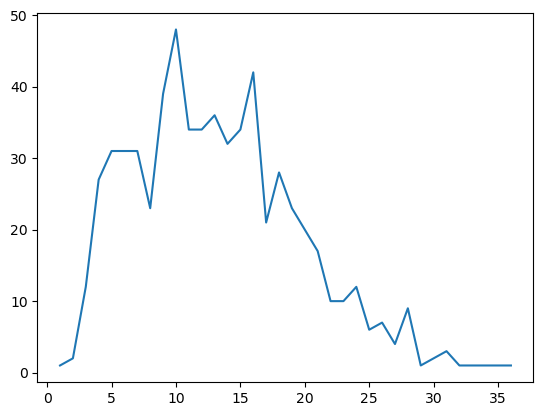

NameError: name 'res' is not defined

In [28]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt


lists = sorted(a.length_dist.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()
print ('total number or hands',len(res))
print ('total before win',total_iterations) 

In [ ]:
plt.hist(reslist,bins=50)

In [ ]:
res={}
res['1']=0
print (cards.cards)
hold=[]
for x in cards.cards:
    hold.append(x)
    y=Onehand(hold,-1)
    y.check()
    print('________')
    print('flop',y.flop, '   x',x) 
    print ('last match',y.lastmatch)
    
    while len(y.lastmatch)>0:
      print ('play pos',y.pos) 
      print ('play lastmatch',y.lastmatch) 
      y.play(y.pos,y.lastmatch[0])   
    print('________')   
print (hold)    
 
 

In [ ]:
a.faceup[1900]

In [ ]:
3 %13

In [ ]:
16 %13